# Data preparation

In [1]:
# Main imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from utils import clean_and_prepare_data
from utils import get_preprocessing_transformer

In [3]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
X, y = clean_and_prepare_data(data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, shuffle=True, random_state=1, stratify=y)

In [5]:
preprocessing = get_preprocessing_transformer()
preprocessing.fit(X_train, y_train)
features = pd.Series(preprocessing.get_feature_names_out())

In [6]:
preprocessing

ColumnTransformer(transformers=[('numerical_transform',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f188a93fd90>),
                                ('categorical_transform',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f188a93f460>)])

In [7]:
X_train_transform = preprocessing.transform(X_train)
X_val_transform = preprocessing.transform(X_val)

# Get feature importance from model

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg')
model.fit(X_train_transform, y_train)

LogisticRegression(solver='newton-cg')

In [9]:
crop_features = [" ".join(str(feature).split("_")[-2:]) for feature in features]

feature_importances = pd.DataFrame(
    {
        "Feature": crop_features,
        "Importance": model.coef_[0]
    }
)

In [10]:
print(
    "[INFO] TOP 10 important features: \n", 
        feature_importances.sort_values(by='Importance', key=abs, ascending=False)\
                            .reset_index(drop=True)[:10]
)

[INFO] TOP 10 important features: 
                           Feature  Importance
0                          tenure   -3.288252
1                    TotalCharges    1.562805
2               Contract Two year   -0.761892
3         Contract Month-to-month    0.747571
4     InternetService Fiber optic    0.498756
5             InternetService DSL   -0.393960
6  PaymentMethod Electronic check    0.310115
7               OnlineSecurity No    0.253330
8                  MonthlyCharges   -0.213885
9             StreamingMovies Yes    0.191810


In [11]:
print(
    "[INFO] TOP 10 unimportant features: \n", 
        feature_importances.sort_values(by='Importance', key=abs, ascending=True)\
                            .reset_index(drop=True)[:10]
)

[INFO] TOP 10 unimportant features: 
                       Feature  Importance
0           Contract One year    0.014317
1               gender Female    0.018098
2                 gender Male   -0.018102
3                  Partner No    0.029029
4                 Partner Yes   -0.029033
5         DeviceProtection No    0.038489
6               Dependents No    0.046733
7              Dependents Yes   -0.046737
8  PaymentMethod Mailed check   -0.054500
9              StreamingTV No   -0.057188


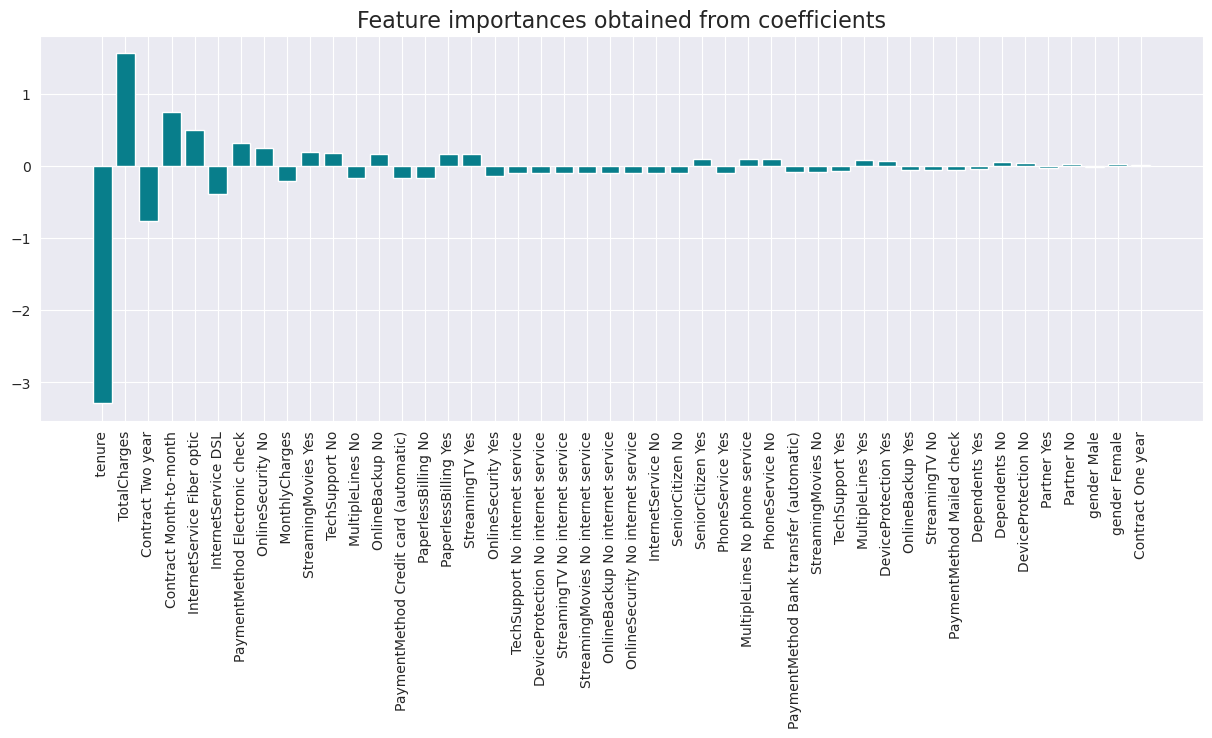

In [12]:
sorted_importances = feature_importances.sort_values(by='Importance', key=abs, ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x=sorted_importances['Feature'], height=sorted_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=16)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

y_pred = model.predict(X_val_transform)
precision = precision_score(y_val, y_pred)
score = f1_score(y_val, y_pred)

print("[INFO] Precision is: ", precision)
print("[INFO] F1-Score is: ", score)

[INFO] Precision is:  0.6721311475409836
[INFO] F1-Score is:  0.6038291605301915
